In [1]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

# Load data files
ml = LoadML(os.path.join(DATAPATH, "simulations", "tree_maxlik.tab"), 
            os.path.join(DATAPATH, "simulations", "tree_truth.bed"), 
            os.path.join(DATAPATH, "simulations", "tree_strsd.bed"))

Populating the interactive namespace from numpy and matplotlib


In [12]:
ml.columns

Index([u'chrom', u'start', u'end', u'log_estmu', u'estbeta', u'estp',
       u'stderr', u'mu', u'beta', u'strsd'],
      dtype='object')

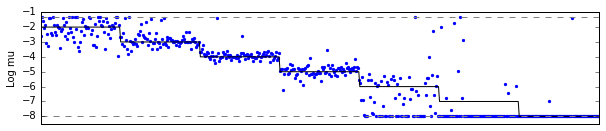

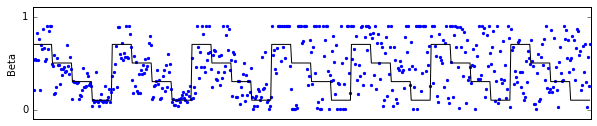

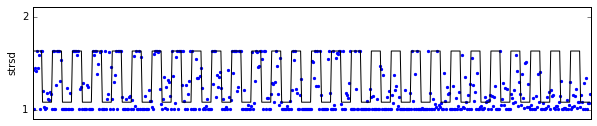

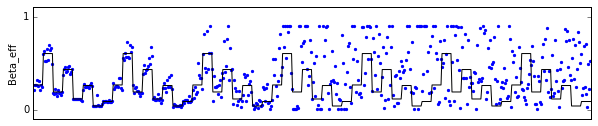

In [20]:
paramcolor = "black"
ml = ml.sort(columns=["mu","beta","strsd"], ascending=False)
order = range(ml.shape[0])
fig = plt.figure()
fig.set_size_inches((10,2))

# mu
fig = plt.figure()
fig.set_size_inches((10,2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(order, np.log10(ml.mu), color=paramcolor, linewidth=1)
ax.scatter(order, ml["log_estmu"], color="blue", s=5)
ax.axhline(-8, linestyle="dashed", color="gray")
ax.axhline(np.log10(0.05), linestyle="dashed", color="gray")
ax.set_ylabel("Log mu")
ax.set_xticks([])
ax.set_xlim(left=0, right=len(order))
ax.set_ylim(bottom=-8.5, top=-1.5)
ax.set_yticks(range(-8,0))
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_simulations_perlocus_mu.pdf"))

# beta
fig = plt.figure()
fig.set_size_inches((10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(order, ml.beta, color=paramcolor, linewidth=1)
ax.scatter(order, ml["estbeta"], color="blue", s=5)
ax.set_ylabel("Beta")
ax.set_xticks([])
ax.set_xlim(left=0, right=len(order))
ax.set_ylim(bottom=-0.1, top=1.1)
ax.set_yticks([0,1])
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_simulations_perlocus_beta.pdf"))

# strsd
fig = plt.figure()
fig.set_size_inches((10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(order, ml.strsd, color=paramcolor, linewidth=1)
ax.scatter(order, np.sqrt(ml.apply(lambda x: ((2-x["estp"])/x["estp"]**2), 1)), color="blue", s=5)
ax.set_ylabel("strsd")
ax.set_xticks([])
ax.set_xlim(left=0, right=len(order))
ax.set_ylim(bottom=0.9, top=2.1)
ax.set_yticks([1,2]);
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_simulations_perlocus_strsd.pdf"))

# beta_eff
fig = plt.figure()
fig.set_size_inches((10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(order, ml.apply(lambda x: x["beta"]/x["strsd"]**2, 1), color=paramcolor, linewidth=1)
ax.scatter(order, ml.apply(lambda x: x["estbeta"]/((2-x["estp"])/x["estp"]**2), 1), color="blue", s=5)
ax.set_ylabel("Beta_eff")
ax.set_xticks([])
ax.set_xlim(left=0, right=len(order))
ax.set_ylim(bottom=-0.1, top=1.1)
ax.set_yticks([0,1])
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure3_simulations_perlocus_betaeff.pdf"))